<a href="https://colab.research.google.com/github/Marco-Fernandes-Filho/Projetos_Data_Science/blob/main/Wine_Quality_%7C_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

#Goal

The idea here is to find out the weight of each predictive for the classification of wine. Determine which characteristics are most indicative for a good quality wine.

Objetivo

A ideia aqui é descobri o peso de cada preditivo para a classificação do vinho. Determinar quais características são mais indicativas para um vinho de boa qualidade.



# Importing required packages

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib as plt 
import seaborn as sns 
import plotly.express as px

#Loading dataset

In [ ]:
data_wine = pd.read_csv('/content/drive/MyDrive/Data - Colab/winequality-red.csv')

# Data Exploration

In [ ]:
data_wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
np.unique(data_wine['quality'], return_counts=True)

(array([3, 4, 5, 6, 7, 8]), array([ 10,  53, 681, 638, 199,  18]))

# Data Visualization


<Axes: xlabel='quality', ylabel='count'>

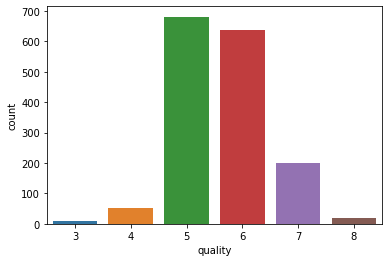

In [ ]:
# Aqui podemos comparar a quantidade de cada vinhos, por nota, temos na nosa base de dados.
# Here we can compare the amount of each wines, per note, we have in the nosa database.
sns.countplot(data_wine, x = 'quality')

<Axes: >

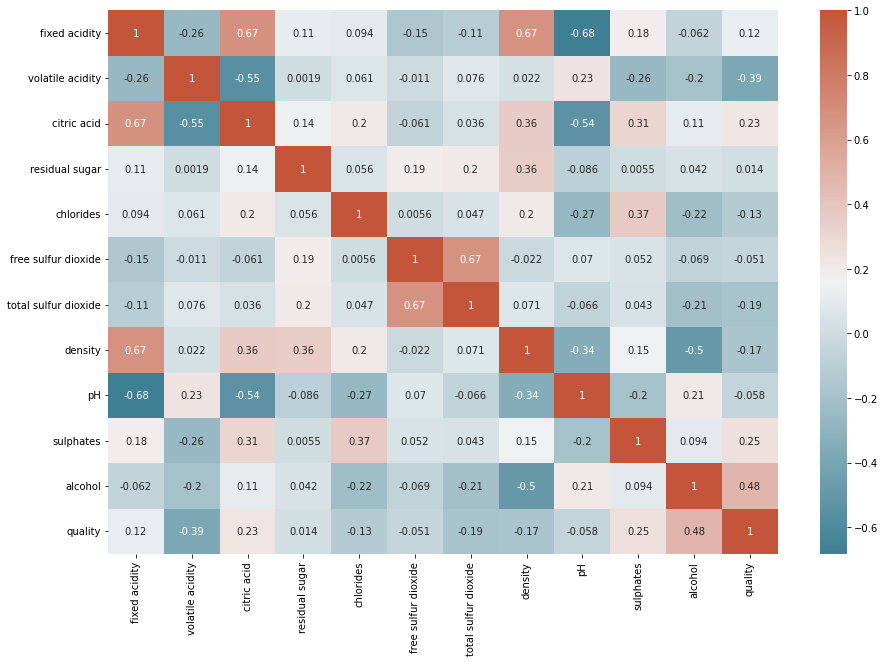

In [ ]:
# Através do .pyplot e da Matriz de Correlação, podemos comparar quais atributos possuem um maior peso para a determinação da qualidade do vinho.
# Through the .pyplot and the correlation matrix, we can compare which attributes have a greater weight for the determination of wine quality.
corr = data_wine.corr() 
plt.pyplot.subplots(figsize=(15,10)) 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220 , 20, as_cmap= True))
# Podemos ver que, a princípio, os níveis de alcool, de sulfato e de ácido cítrico são os maiores determinantes para a qualidade do vinho.
# We can see that, at first, alcohol, sulfate and citrus acid levels are the largest determinants for wine quality.

# Classification division

In [ ]:
# Para melhor comparar a qualidade dos vinhos, decidi agrupar-los em duas classificações:
# -> Vinhos de boa qualidade (nota maior que 6);
# -> Vinhos de baixa qualidade (nota menor que 6);
for i in range(len(data_wine)):
  if data_wine['quality'][i] > 6:
    data_wine['quality'][i] = 1
  else:
    data_wine['quality'][i] = 0
print(data_wine['quality'])


<ipython-input-16-e83326d2e64f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wine['quality'][i] = 0
<ipython-input-16-e83326d2e64f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wine['quality'][i] = 1


0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [ ]:
data_wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [ ]:
data_wine.shape

(1599, 12)

# Division between predators and class

In [ ]:
data_wine_x = data_wine.iloc[:, 0:11].values

In [ ]:
data_wine_y = data_wine['quality'].values

In [ ]:
x_col = data_wine.iloc[:, 0:11]

In [ ]:
type(data_wine_x)

numpy.ndarray

# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_wine = StandardScaler()
data_wine_x = scaler_wine.fit_transform(data_wine_x)

# Division of bases into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_wine_x_treinamento, data_wine_x_teste, data_wine_y_treinamento, data_wine_y_teste = train_test_split(data_wine_x, data_wine_y, test_size = 0.25, random_state = 0)

# Modeling

## Random Forest - 92,0%

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_wine = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0, min_samples_split= 5)
random_forest_wine.fit(data_wine_x_treinamento, data_wine_y_treinamento);

In [ ]:
rd_predict = random_forest_wine.predict(data_wine_x_teste)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(data_wine_y_teste, rd_predict)

0.92

## XGBoost - 91,75%

In [ ]:
import xgboost as xgb
xgb_wine = xgb.XGBClassifier(random_state=1)
xgb_wine.fit(data_wine_x_treinamento, data_wine_y_treinamento)
xgb_predict = xgb_wine.predict(data_wine_x_teste)

In [ ]:
accuracy_score(data_wine_y_teste, xgb_predict)

0.9175

## SVM - 90%

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_wine = SVC(kernel='rbf', random_state=1, C = 2.0, tol = 0.001 ) # 2 -> 4
svm_wine.fit(data_wine_x_treinamento, data_wine_y_treinamento);

In [ ]:
svm_predict = svm_wine.predict(data_wine_x_teste)
accuracy_score(data_wine_y_teste, svm_predict)

0.9075

## Neural networks - 91%

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
rede_neural_wine = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20))
rede_neural_wine.fit(data_wine_x_treinamento, data_wine_y_treinamento)

In [ ]:
mlp_predict = rede_neural_wine.predict(data_wine_x_teste)


In [ ]:
accuracy_score(data_wine_y_teste, mlp_predict)

0.9125

## ADABoost 89,5%

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_wine = AdaBoostClassifier(random_state=1, learning_rate= 0.1, n_estimators= 2000)
ada_wine.fit(data_wine_x_treinamento, data_wine_y_treinamento)
ada_predict = ada_wine.predict(data_wine_x_teste)


In [ ]:
accuracy_score(data_wine_y_teste, ada_predict)

0.895

# Tunning with GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

## Random Forest - 92%

In [ ]:
random_params = {'criterion': ['gini', 'entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=random_params)
grid_search.fit(data_wine_x_treinamento, data_wine_y_treinamento)
best_parameter_random = grid_search.best_params_
best_result_random = grid_search.best_score_


In [ ]:
print(best_parameter_random)
print(best_result_random)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
0.8999198047419805


In [ ]:
random_predict_grid = grid_search.predict(data_wine_x_teste)
accuracy_score(data_wine_y_teste, random_predict_grid)

0.925

## XGBoost - 90%

In [ ]:
xgb_params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=xgb_params)
grid_search.fit(data_wine_x_treinamento, data_wine_y_treinamento)
best_parameter_xgb = grid_search.best_params_
best_result_xgb = grid_search.best_score_

In [ ]:
print(best_parameter_xgb)
print(best_result_xgb)

{'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 0.8}
0.9024232914923292


## SVM - 90,75

In [ ]:
svm_params = {'tol': [0.001, 0.0001, 0.00001],
              'C': [1.0, 1.5, 2.0, 3.0, 4.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [ ]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=svm_params)
grid_search.fit(data_wine_x_treinamento, data_wine_y_treinamento)
best_parameter_svm = grid_search.best_params_
best_result_svm = grid_search.best_score_

In [ ]:
print(best_parameter_svm)
print(best_result_svm)

{'C': 2.0, 'kernel': 'rbf', 'tol': 0.001}
0.8790794979079498


In [ ]:
svm_predict_grid = grid_search.predict(data_wine_x_teste)
accuracy_score(data_wine_y_teste, svm_predict_grid)

0.9075

## Neural Networks - 89%

In [ ]:
mpl_params = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [ ]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=mpl_params)
grid_search.fit(data_wine_x_treinamento, data_wine_y_treinamento)
best_parameter_mlp = grid_search.best_params_
best_result_mlp = grid_search.best_score_

In [ ]:
print(best_parameter_mlp)
print(best_result_mlp)

{'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}
0.8891004184100417


## AdaBoost 89,95%

In [ ]:
ada_params={'n_estimators':[500,1000,2000],
             'learning_rate':[.001,0.01,.1]}

In [ ]:
grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=ada_params)
grid_search.fit(data_wine_x_treinamento, data_wine_y_treinamento)
best_parameter_ada = grid_search.best_params_
best_result_ada = grid_search.best_score_

In [ ]:
print(best_parameter_ada)
print(best_result_ada)

{'learning_rate': 0.1, 'n_estimators': 2000}
0.8799058577405857


In [ ]:
ada_predict_grid = grid_search.predict(data_wine_x_teste)
accuracy_score(data_wine_y_teste, ada_predict_grid)

0.895

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
resultados_random_forest = []
resultados_xgb_boost = []
resultados_svm = []
resultados_rede_neural = []
resultados_ada_boost = []

In [ ]:
# Uma vez com os melhores parâmetros dos modelos de aprendizado, podemos realizar a validação cruzada
for i in range(30):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split=5, n_estimators = 100)
  scores = cross_val_score(random_forest, data_wine_x, data_wine_y, cv = kfold)
  resultados_random_forest.append(scores.mean())

  xgb_boost = xgb.XGBClassifier(colsample_bytree = 0.6, gamma = 0.5, max_depth = 4, min_child_weight = 1, subsample = 0.8)
  scores = cross_val_score(xgb_boost, data_wine_x, data_wine_y, cv = kfold)
  resultados_xgb_boost.append(scores.mean())

  svm = SVC(kernel = 'rbf', C = 2.0)
  scores = cross_val_score(svm, data_wine_x, data_wine_y, cv = kfold)
  resultados_svm.append(scores.mean())

  rede_neural = MLPClassifier(activation = 'relu', batch_size = 10, solver = 'adam')
  scores = cross_val_score(rede_neural, data_wine_x, data_wine_y, cv = kfold)
  resultados_rede_neural.append(scores.mean())

  ada_boost = AdaBoostClassifier(learning_rate = 0.1, n_estimators = 2000)
  scores = cross_val_score(ada_boost, data_wine_x, data_wine_y, cv = kfold)
  resultados_ada_boost.append(scores.mean())

In [ ]:
resultados = pd.DataFrame({'Random forest': resultados_random_forest,
                           'xgb_boost': resultados_xgb_boost,
                           'SVM': resultados_svm, 
                           'Rede neural': resultados_rede_neural,
                           'ada_boost': resultados_ada_boost})
resultados

In [ ]:
# Podemos concluir que o modelo de Random Forest é o mais efetivo quando classificamos a qualidade de vinho.
# We can conclude that the Random Forest model is the most effective when classifying wine quality.
resultados.describe()

,Random forest,xgb_boost,SVM,Rede neural,ada_boost
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.912987,0.910212,0.884905,0.898247,0.883656
std,0.003147,0.004929,0.002096,0.004113,0.003851
min,0.904277,0.896792,0.880546,0.889300,0.876781
25%,0.911168,0.907592,0.883797,0.896181,0.880717
50%,0.913699,0.910574,0.885554,0.898384,0.882754
75%,0.914953,0.913703,0.886204,0.901201,0.886018
max,0.918695,0.918695,0.888050,0.904292,0.891792


# Feature Importance

Abaixo, representei graficamente a importância do recurso com base no modelo Random Forest, no modelo XGBoost e Adaboost.

Below, I graphically represented the importance of the resource based on the Random Forest model, the XGboost and Adaboost model

<AxesSubplot:>

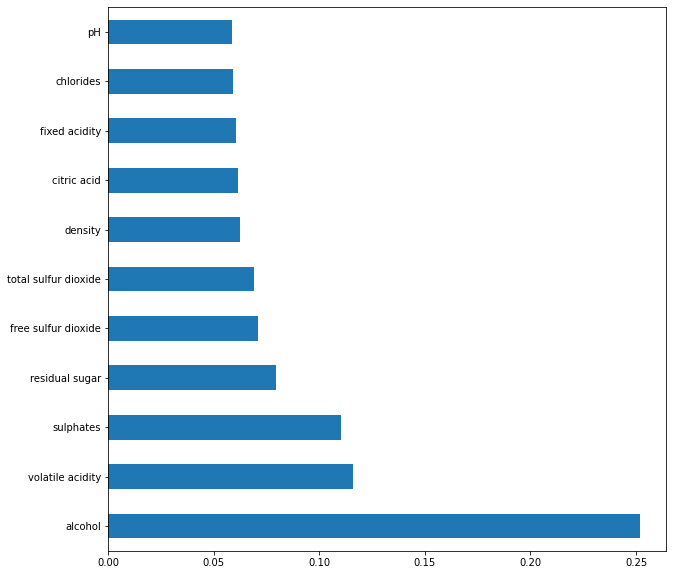

In [ ]:
feat_importances = pd.Series(xgb_wine.feature_importances_, index=x_col.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [ ]:
type(data_wine)

pandas.core.frame.DataFrame

<AxesSubplot:>

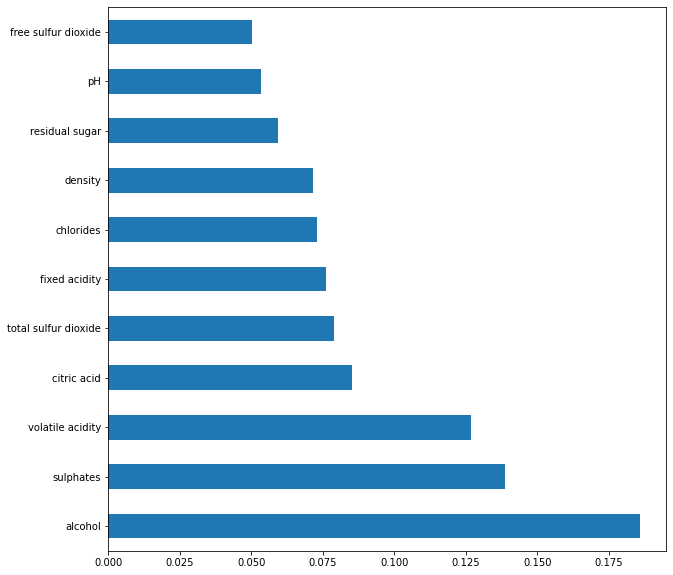

In [ ]:
feat_importances = pd.Series(random_forest_wine.feature_importances_, index=x_col.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

<AxesSubplot:>

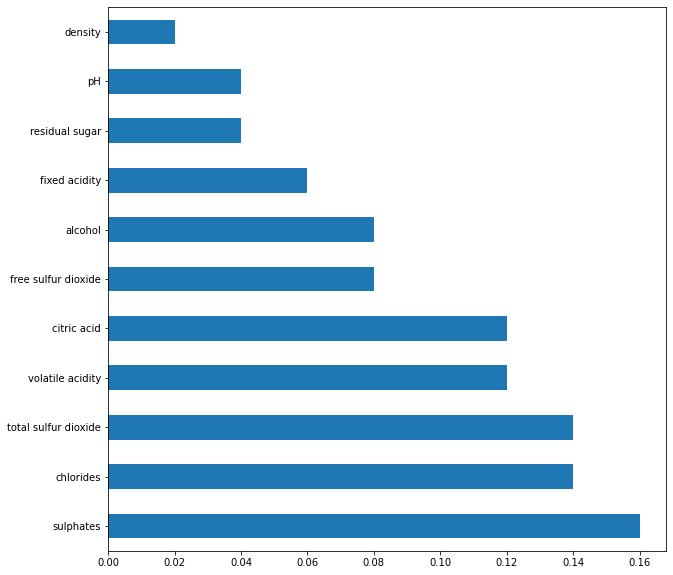

In [ ]:
feat_importances = pd.Series(ada_wine.feature_importances_, index=x_col.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

# Describre

Analisando os gráficos acima, podemos identificar quais são os fatores que são mais determinantes para a qualidade de um vinho. O álcool e o sulfato, por exemplo, parecem ser mais determinantes para a classifação da bebida. Portanto, dados um certo nível dos atributos (estimados como sendo o nível perfeito), a probabilidade de classificar esse vinho como de "boa qualidade" se torna maior.

OBS: Este modelo foi criado para estimar a qualidade de um vinho e o peso que esses atributos tem nesta classificação. Contudo, dados como gosto e qualidade da fruta, estatístcas essas dificies de serem mensuradas, dicaram fora do modelo de aprendizado.


Analyzing the graphs above, we can identify which are the factors that are most decisive for the quality of a wine. Alcohol and sulfate, for example, seem to be more determinant for the beverage's classification. Therefore, given a certain level of attributes (estimated to be the perfect level), the probability of classifying this wine as "good quality" becomes greater.

NOTE: This model was created to estimate the quality of a wine and the weight these attributes have in this classification. However, data such as fruit taste and quality, statistics that are difficult to measure, were outside the learning model.

In [ ]:
# Filtrando df apenas para boa qualidade 
# Filtering DF for good quality only

df_temp = data_wine[data_wine['quality']==1] 
df_temp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,1.0
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,1.0
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000,1.0
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000,1.0
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000,1.0
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,1.0


In [ ]:
# Filtrando df apenas para qualidade ruim 
# Filtering dF for bad quality only
df_temp2 = data_wine[data_wine['quality']==0] 

df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.0
mean,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,0.0
std,1.682726,0.176337,0.189665,1.415778,0.049113,10.467685,32.585604,0.001808,0.154135,0.170629,0.969664,0.0
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.0
25%,7.100000,0.420000,0.082500,1.900000,0.071000,8.000000,23.000000,0.995785,3.210000,0.540000,9.500000,0.0
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.500000,0.996800,3.310000,0.600000,10.000000,0.0
75%,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.410000,0.700000,10.900000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,0.0
